**MULTI-ARMED BANDIT**  
* Multiple slot machines - how do you play them to maximize returns?  
* Assumption that each machine has a distribution.  You don't know the distributions.  
* Want to figure out which to play.  
* Need to spend money to determine which is best - then just play the best machine.  
* Exploration/exploitation - costs money to determine best machine - want to be as efficient as possible.  
* Optimize method - to avoid regret.  But if you don't explore long enough - suboptimal machine more likely.  

**Real World Example**  
* Marketing:  Look at 5 different ads (can be any number).  
* A/B Test uniformly uses all options - these are just for exploration.  
* Want to exploit in the process of exploring.  

**MULTI-ARMED BANDIT PROBLEM - MODERN APPLICATION**  
* We have d ads that we display to users each time they connect to a web page.  
* Each time a user connects to the page - that makes a round.  
* At each round n, we choose one ad to display to the user.  
* At each round n, ad i gives reward 1 if user clicks, o.w. 0.  
* Our goal is to maximize the total reward we get over many rounds.  

**UCB INTUITION / ALGORITHM**  
* For our example - assume 5 ads - each has its own distribution and Expected Value.  
* We do not know the Distributions or Expected Values - so we start off assuming they all have the same Expected Value.  
* Model calculates confidence bands for each ad.  
* Begin - all are the same - all are very wide - pick one at random.  
* Observation moves E[X] AND shrinks confidence interval.  
* Next observation is selected from option with lowest upper bound.  
* As you select best machine more and more - CI shrinks - results in trying another option with wider CI.  

In [1]:
data.ads <- read.csv('Ads_CTR_Optimisation.csv')

* For UCB - we would be working without data - we would be updating as we go.  
* data.ads that we imported above is for simulation.  
* Data above contains 10,000 simulated rounds for 10 ads.  
* Begin by selecting at random for demonstration.  

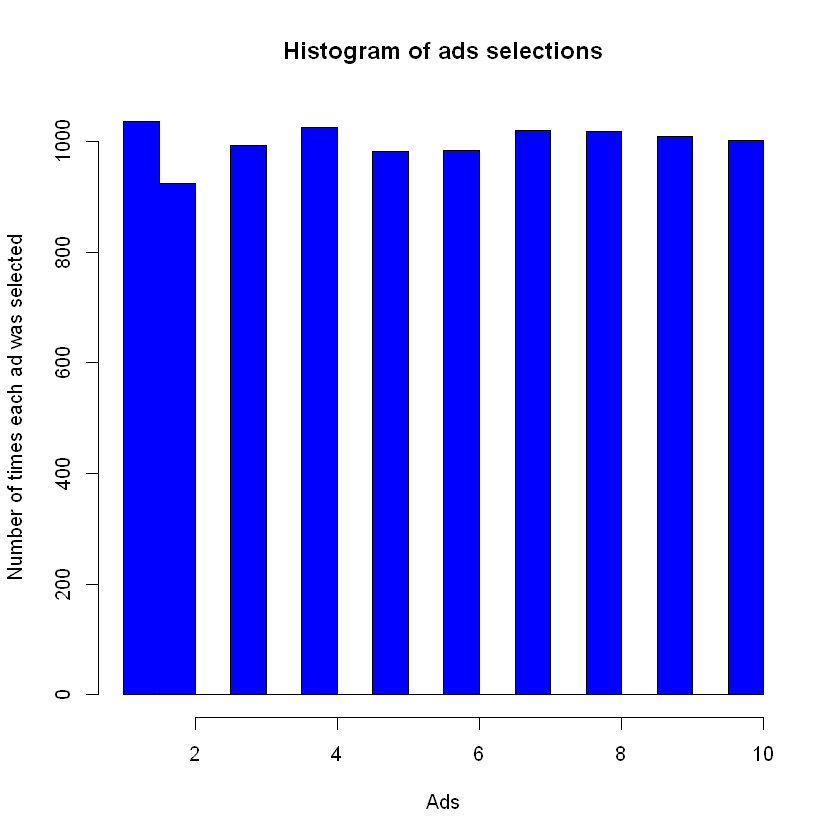

In [2]:
# Random Selection

# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')

# Implementing Random Selection
N = 10000
d = 10
ads_selected = integer(0)
total_reward = 0
for (n in 1:N) {
  ad = sample(1:10, 1)
  ads_selected = append(ads_selected, ad)
  reward = dataset[n, ad]
  total_reward = total_reward + reward
}

# Visualising the results
hist(ads_selected,
     col = 'blue',
     main = 'Histogram of ads selections',
     xlab = 'Ads',
     ylab = 'Number of times each ad was selected')

In [3]:
total_reward

[1] 1266

* There is not really a package for UCB - so we will build it from scratch.  

**UCB ALGORITHM**  
![](ucb_algo.PNG)

In [16]:
N <- 10000
d <- 10
ads.selected <- integer(0)
selection.numbers <- integer(d)
reward.sum <- integer(d)
total.reward <- 0

for(n in 1:N) {
    
    ad <- 0
    max.upper.bound <- 0
    
    for(i in 1:d){
        
        if(selection.numbers[i] > 0) {
            
        reward.average <- reward.sum[i]/selection.numbers[i]
        delta.i <- sqrt(3/2 * log(n)/selection.numbers[i])
        upper.bound <- reward.average + delta.i
            } else {
            
            upper.bound <- 1e400
        }
        if(upper.bound > max.upper.bound) {
            max.upper.bound = upper.bound
            ad <- i
        }
    }

        ads.selected <- append(ads.selected, ad)
        selection.numbers[ad] = selection.numbers[ad] + 1
        reward <- dataset[n, ad]
        reward.sum[ad] <- reward.sum[ad] + reward
        total.reward <- total.reward + reward
}

In [5]:
total.reward

[1] 2178

* Nearly double the score we got from random selection.

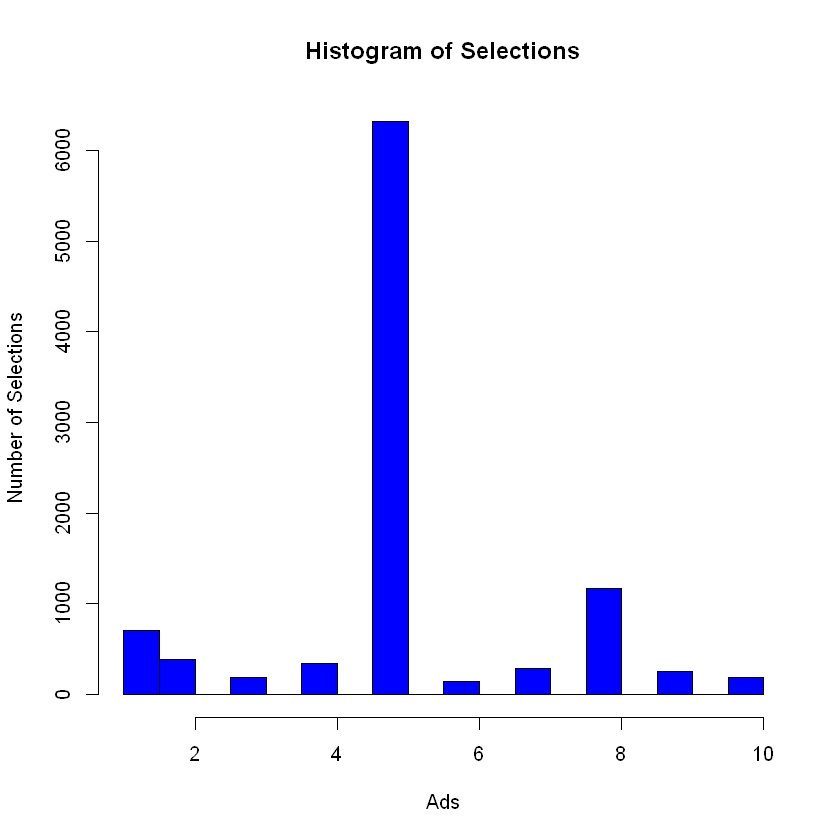

In [17]:
hist(ads.selected,
    col = 'blue',
    main = 'Histogram of Selections',
    xlab = 'Ads',
    ylab = 'Number of Selections')

In [18]:
ads.selected <- as.data.frame(ads.selected)
ads.selected$ID <- seq.int(nrow(ads.selected))

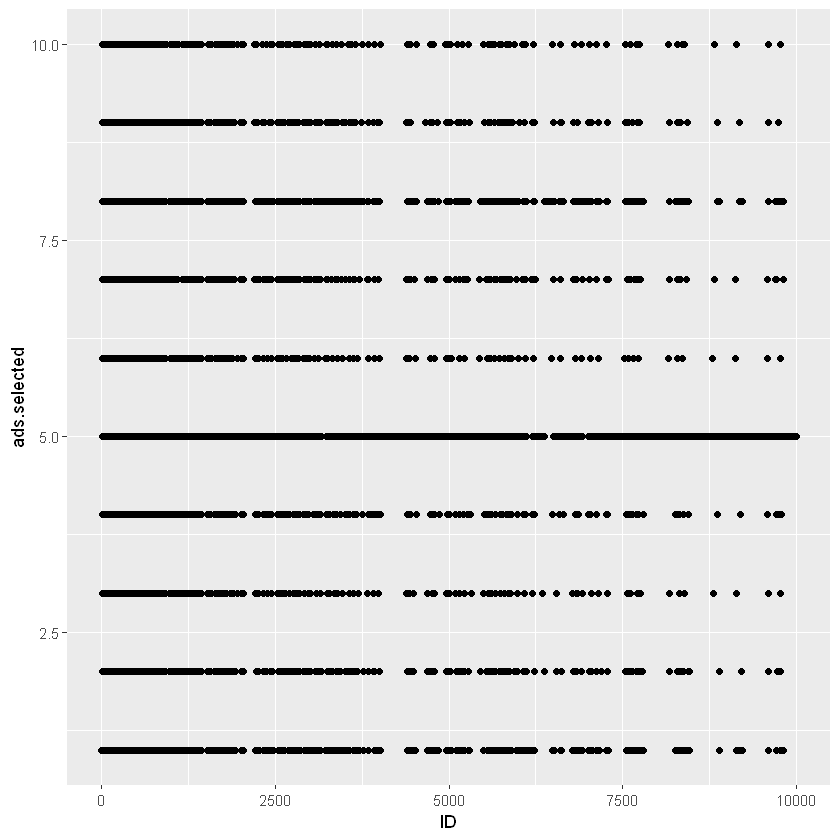

In [19]:
library(ggplot2)
ggplot(ads.selected, aes(x = ID, y = ads.selected)) + geom_point()